In [32]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
sns.set()
import matplotlib.pyplot as plt

In [33]:
def read_csv(file_path, has_header=True):
    with open(file_path) as f:
        if has_header: f.readline()
        data = []
        for line in f:
            line = line.strip().split(",")
            data.append([x for x in line])
    return data

In [36]:
datasetfile = "DL/training/GCseq.csv"

In [64]:
dataset = read_csv(datasetfile)
X = np.array([z[1:] for z in dataset])
y = np.array([z[0] for z in dataset])

In [65]:
X = X.astype(np.float)

In [66]:
import numpy as np
np.set_printoptions(threshold=np.nan)
SEQ_LEN = 25
X1 = X[:,0:1*SEQ_LEN]
X2 = X[:,1*SEQ_LEN:2*SEQ_LEN]
X3 = X[:,2*SEQ_LEN:3*SEQ_LEN]
X4 = X[:,3*SEQ_LEN:4*SEQ_LEN]

X3[np.where(X3 != 0 )] = np.log(X3[np.where(X3 != 0 )])


In [67]:
print(X4[y == 'ssl.gstatic.com'])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  -1. -1. -1. -1.  1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1. -1. -1. -1. -1.  1. -1.]
 [ 1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  -1. -1. -1. -1.  1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  -1. -1. -1. -1.  1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  -1. -1. -1. -1.  1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  -1. -1. -1. -1.  1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  -1. -1. -1. -1.  1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  -1. -1. -1. -1.  1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

In [68]:
print(X1[y == 'ssl.gstatic.com'])

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.  273. 1434.  746. 1434.  884.  328.  360.
   170.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.  273. 1434.  746. 1434.  884.  328.
   464.]
 [ 273. 1434.  746. 1434.  885.  328.  119.  116.  108.  248.  360.  170.
   158.  104.  104.  341. 1434.  108. 1434.  746. 1434.  879. 1434. 1434.
  1434.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.  273. 1434.  746. 1434.  884.  328.  360.
   170.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.  273. 1434.  746. 1434.  884.  328.  360.
   170.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.  273. 1434.  746. 1434.  883.  328.  360.
   170.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.   

In [69]:
print(X2[y == 'ssl.gstatic.com'])

[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 2.070e+02 1.368e+03 6.800e+02 1.368e+03
  8.180e+02 2.620e+02 2.940e+02 1.040e+02]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.070e+02 1.368e+03 6.800e+02
  1.368e+03 8.180e+02 2.620e+02 3.980e+02]
 [2.070e+02 1.368e+03 6.800e+02 1.368e+03 8.190e+02 2.620e+02 5.300e+01
  5.000e+01 4.200e+01 1.820e+02 2.940e+02 1.040e+02 9.200e+01 3.800e+01
  3.800e+01 2.750e+02 1.368e+03 4.200e+01 1.368e+03 6.800e+02 1.368e+03
  8.130e+02 1.368e+03 1.368e+03 1.368e+03]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 2.070e+02 1.368e+03 6.800e+02 1.368e+03
  8.180

In [70]:
print(X3[y == 'ssl.gstatic.com'])

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.          -4.29196117 -12.41602463
  -12.41602463 -12.20471553  -4.52941263  -4.86641546  -9.84656059]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.          -4.94385835
   -9.31434378 -12.2535057  -12.41602463  -5.14215673  -5.0028347 ]
 [  0.          -4.97146643 -12.41602463 -12.41602463 -12.03036215
   -4.52442993  -6.57777982  -8.30611555  -5.27809177  -9.00313121
  -10.15548777  -9.37150219  -9.55214449  -7.25899979  -8.63317279
   -5.17360547  -8.81951849 -12.41602463  -8.66859884 -12.41602463
  -12.41602463 -12.20471553  -7.91817767  -9.94593306  -5.36958215]
 [  0.           0.           0.        

In [22]:
snis, indices, counts = np.unique(y, return_index=True, return_counts=True)

In [6]:
top_ten = sorted(zip(counts, snis))[-10:]
counts = [x for x, _ in top_ten]
top_snis = [x for _, x in top_ten]

['assets.adobedtm.com', 'mc.yandex.ru', 'tags.tiqcdn.com', 'google.com', 'pixel.quantserve.com', 'ascii.jp', 'ssl.gstatic.com', 'google.fr', 'd.adroll.com', 'secure.adnxs.com']


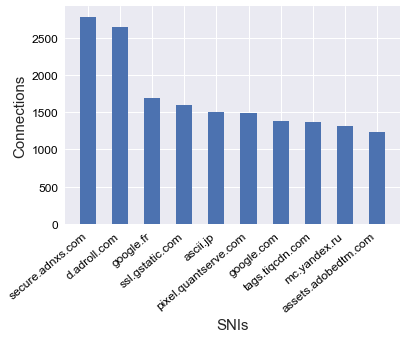

In [7]:
width = 0.5
plt.bar([x for x in reversed(top_snis)], [x for x in reversed(counts)],width)
plt.xticks(color='k',rotation=40, size=12, ha='right')
plt.yticks( color='k', size=12)
plt.xlabel('SNIs', fontsize= 15)
plt.ylabel('Connections', fontsize= 15)


#plt.savefig('imgs/classes.png', bbox_inches='tight')

plt.show()

In [19]:
dataset = read_csv('final_results.csv')
df = pd.DataFrame(dataset)


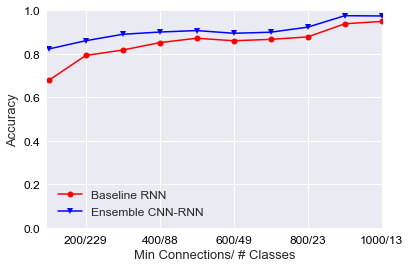

In [20]:
legend_format =  ['-or', '-vb']
idx= 0
for k1, v1 in df.groupby([0], as_index=False):
    if k1 not in ['Baseline RNN', 'Ensemble CNN-RNN']:
        continue
    x = []
    y = []
    for k2, v2 in v1.groupby([1], as_index=False):
        x.append(pd.to_numeric(k2))
        y.append(pd.to_numeric(v2[2]).mean())
    
    xp = [i for i, _ in sorted(zip(x,y))]
    yp = [i for _, i in sorted(zip(x,y))]
    plt.plot(xp, yp, legend_format[idx],linewidth=1.5,markersize=6, label=k1)
    idx += 1
    
plt.xticks( color='k', size=12)
plt.yticks( color='k', size=12)
plt.xlabel('Min Connections/ # Classes', fontsize= 13)
plt.ylabel('Accuracy', fontsize= 13)
plt.ylim(0.0,1)
plt.xlim(95,1000)
plt.xticks((200, 400, 600,800,1000), ('200/229', '400/88', '600/49','800/23','1000/13'), color='k', size=12)

plt.legend(fontsize= 12, fancybox= True, shadow=True)
  
plt.savefig('imgs/improvement.png', bbox_inches='tight')

plt.show()

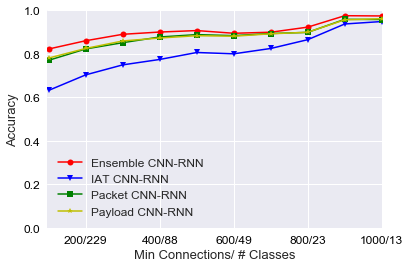

In [21]:
fontsize = 12
legend_format =  ['-or', '-vb', '-sg', '-*y']
idx= 0
for k1, v1 in df.groupby([0], as_index=False):
    if k1 not in ['IAT CNN-RNN', 'Packet CNN-RNN', 'Payload CNN-RNN', 'Ensemble CNN-RNN']:
        continue
    x = []
    y = []
    for k2, v2 in v1.groupby([1], as_index=False):
        x.append(pd.to_numeric(k2))
        y.append(pd.to_numeric(v2[2]).mean())
    
    xp = [i for i, _ in sorted(zip(x,y))]
    yp = [i for _, i in sorted(zip(x,y))]
    plt.plot(xp, yp, legend_format[idx],linewidth=1.5,markersize=6, label=k1)
    idx += 1

plt.xlabel('Min Connections/ # Classes', fontsize= 13)
plt.xticks((200, 400, 600,800,1000), ('200/229', '400/88', '600/49','800/23','1000/13'), color='k', size=12)

    
plt.yticks( color='k', size=fontsize)
plt.ylabel('Accuracy', fontsize= 13)
plt.ylim(0.0,1)
plt.xlim(95,1000)
plt.legend(fontsize= fontsize, fancybox= True, shadow=True)
  
plt.savefig('imgs/ensemble.png', bbox_inches='tight')

plt.show()

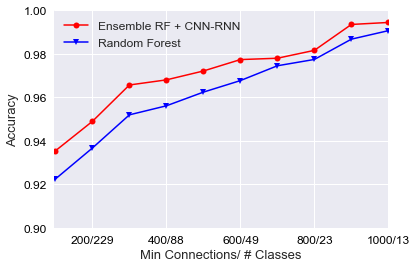

In [22]:
legend_format =  ['-or', '-vb']
idx= 0
for k1, v1 in df.groupby([0], as_index=False):
    if k1 not in ['Random Forest', 'Ensemble RF + CNN-RNN']:
        continue
    x = []
    y = []
    for k2, v2 in v1.groupby([1], as_index=False):
        x.append(pd.to_numeric(k2))
        y.append(pd.to_numeric(v2[2]).mean())
    
    xp = [i for i, _ in sorted(zip(x,y))]
    yp = [i for _, i in sorted(zip(x,y))]
    plt.plot(xp, yp,legend_format[idx],linewidth=1.5,markersize=6, label=k1)
    idx += 1
    plt.xlabel('Min Connections')
    plt.ylabel('Accuracy')
    
plt.xticks( color='k', size=fontsize)
plt.yticks( color='k', size=fontsize)
plt.xlabel('Min Connections/ # Classes', fontsize= 13)
plt.xticks((200, 400, 600,800,1000), ('200/229', '400/88', '600/49','800/23','1000/13'), color='k', size=12)
plt.ylabel('Accuracy', fontsize= fontsize+1)
plt.ylim(0.9,1)
plt.xlim(95,1000)
plt.legend(fontsize= fontsize, fancybox= True, shadow=True)
  
plt.savefig('imgs/RFvsEnsemble.png', bbox_inches='tight')

plt.show()

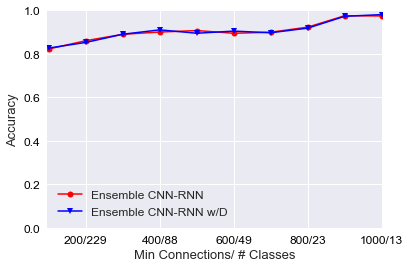

In [23]:
legend_format =  ['-or', '-vb']
idx= 0
for k1, v1 in df.groupby([0], as_index=False):
    if k1 not in ['Ensemble CNN-RNN w/D', 'Ensemble CNN-RNN']:
        continue
    x = []
    y = []
    for k2, v2 in v1.groupby([1], as_index=False):
        x.append(pd.to_numeric(k2))
        y.append(pd.to_numeric(v2[2]).mean())
    
    xp = [i for i, _ in sorted(zip(x,y))]
    yp = [i for _, i in sorted(zip(x,y))]
    plt.plot(xp, yp,legend_format[idx],linewidth=1.5,markersize=6, label=k1)
    idx += 1
    plt.xlabel('Min Connections')
    plt.ylabel('Accuracy')
    
plt.xticks( color='k', size=fontsize)
plt.yticks( color='k', size=fontsize)
plt.xlabel('Min Connections/ # Classes', fontsize= 13)
plt.xticks((200, 400, 600,800,1000), ('200/229', '400/88', '600/49','800/23','1000/13'), color='k', size=12)
plt.ylabel('Accuracy', fontsize= fontsize+1)
plt.ylim(0.0,1)
plt.xlim(95,1000)
plt.legend(fontsize= fontsize, fancybox= True, shadow=True)
  
plt.savefig('imgs/directionality.png', bbox_inches='tight')

plt.show()

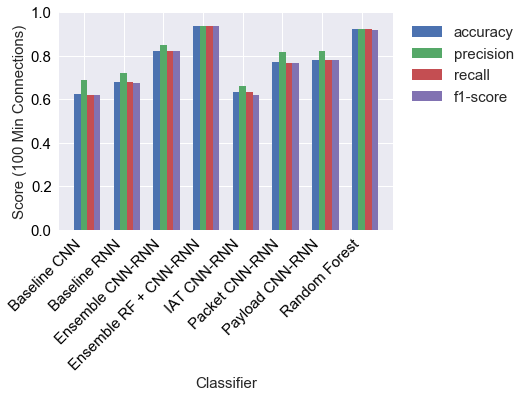

In [24]:
fontsize = 15
x = []
y1 = []
y2 = []
y3 = []
y4 = []
for k1, v1 in df.groupby([0], as_index=False):
    if k1 not in ['Random Forest', 'Baseline CNN', 'Baseline RNN', 'IAT CNN-RNN', 'Packet CNN-RNN', 'Payload CNN-RNN', 'Ensemble CNN-RNN', 'Ensemble RF + CNN-RNN']:
        continue
    x.append(k1)
    for k2, v2 in v1.groupby([1], as_index=False):
        if pd.to_numeric(k2) != 100:
            continue
        y1.append(pd.to_numeric(v2[2]).mean())
        y2.append(pd.to_numeric(v2[3]).mean())
        y3.append(pd.to_numeric(v2[4]).mean())
        y4.append(pd.to_numeric(v2[5]).mean())
    
indices = np.arange(len(x))
width = np.min(np.diff(indices)) / 6.0

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(indices-width,y1,width,label='accuracy')
ax.bar(indices,y2,width,label='precision')
ax.bar(indices+width,y3,width,label='recall')
ax.bar(indices+width+width,y4,width,label='f1-score')
ax.set_xlabel('Classifier', fontsize = fontsize)
ax.set_ylabel('Score (100 Min Connections)', fontsize = fontsize)
ax.set_xticklabels(['Baseline RNN'] + x, rotation=45, ha = 'right')
ax.set_ylim(0.0,1)
ax.legend(bbox_to_anchor=(0.6, 0.0, 0.8, 1.0), fontsize = fontsize, fancybox= True, shadow=True)

plt.xticks( color='k', size= fontsize)
plt.yticks( color='k', size= fontsize)
plt.savefig('imgs/metrics.png', bbox_inches='tight')
plt.show()


In [18]:
dataset = read_csv('class_results.csv', has_header=False)
df = pd.DataFrame(dataset)

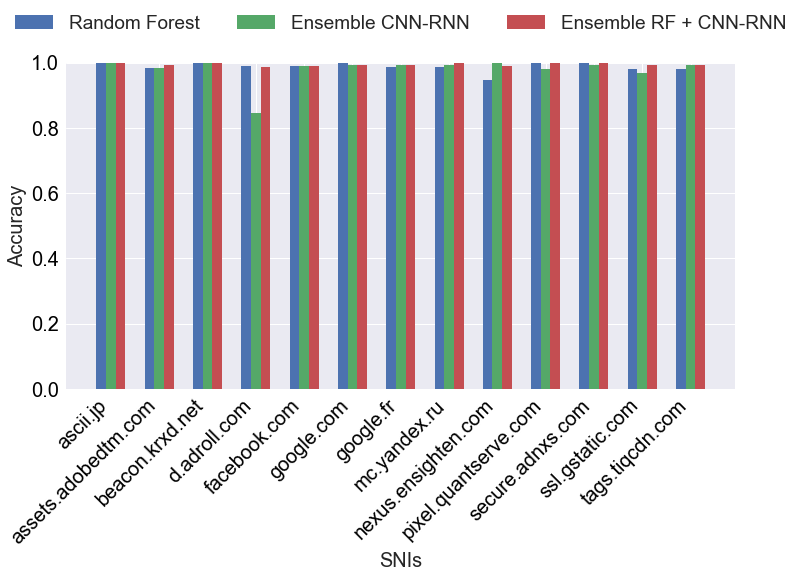

'\nfor item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):\n    item.set_fontsize(12)\n'

In [19]:
fontsize = 20
x = []
y = []
snis = []
header = True
for row in df.iterrows():
    index, data = row
    if header:
        snis = data.tolist()[1:]
        header = False
        continue
    
    acc = [float(i) for i in data.tolist()[1:]]
    y.append(acc)
    x.append(data.tolist()[0])
    
indices = np.arange(len(y[0]))
width = np.min(np.diff(indices)) / 5.0

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.bar(indices-width,y[0],width,label=x[0])
#ax.bar(indices-width-width,y[1],width,label=x[1])
#ax.bar(indices-width,y[2],width,label=x[2])
#ax.bar(indices,y[3],width,label=x[3])
#ax.bar(indices+width,y[4],width,label=x[4])
ax.bar(indices,y[5],width,label=x[5])
ax.bar(indices+width,y[6],width,label=x[6])
ax.set_xlabel('SNIs',fontsize = fontsize)
ax.set_ylabel('Accuracy',fontsize = fontsize)
ax.set_xticks(range(len(y[0])))
ax.set_xticklabels(snis, rotation=45, ha = 'right')
ax.set_ylim(0.0,1)
ax.legend(ncol = 3, loc = 'upper center', bbox_to_anchor=(0.5,1.2), fontsize = 19, fancybox= True, shadow=True)

plt.xticks( color='k', size= fontsize)
plt.yticks( color='k', size= fontsize)
plt.savefig('imgs/perSNIBest.png', bbox_inches='tight')
plt.show()

"""
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
"""

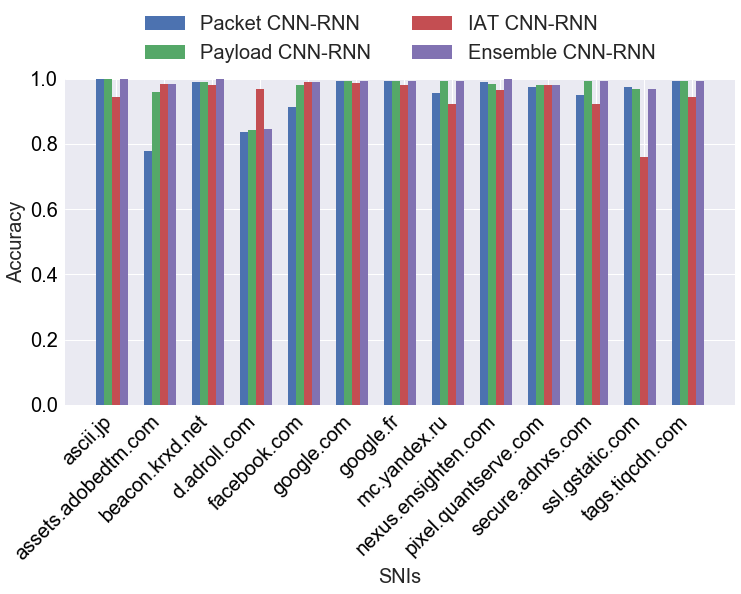

In [20]:
indices = np.arange(len(y[0]))
width = np.min(np.diff(indices)) / 6.0

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
#ax.bar(indices+width,y[0],width,label=x[0])
#ax.bar(indices-width-width,y[1],width,label=x[1])
ax.bar(indices-width-width,y[2],width,label=x[2])
ax.bar(indices-width,y[3],width,label=x[3])
ax.bar(indices,y[4],width,label=x[4])
ax.bar(indices+width,y[5],width,label=x[5])
#ax.bar(indices+width+width+width,y[6],width,label=x[6])
ax.set_xlabel('SNIs',fontsize = fontsize)
ax.set_ylabel('Accuracy',fontsize = fontsize)
ax.set_xticks(range(len(y[0])))
ax.set_xticklabels(snis, rotation=45, ha = 'right')
ax.set_ylim(0.0,1)
ax.legend(ncol = 2, loc = 'upper center', bbox_to_anchor=(0.5,1.25), fontsize = fontsize, fancybox= True, shadow=True)

plt.xticks( color='k', size= fontsize)
plt.yticks( color='k', size= fontsize)
plt.savefig('imgs/perSNIEnsemble.png', bbox_inches='tight')
plt.show()


In [11]:
from collections import defaultdict
dataset = read_csv('final_results.csv')
df = pd.DataFrame(dataset)

res = []

keys = {
    'Ensemble RF + CNN-RNN' : 'A',
    'Random Forest' : 'B',
    'Ensemble CNN-RNN' : 'C',
    'Ensemble CNN-RNN w/D' : 'D',
    'Ensemble CNN-RNN 12' : 'E',
    'Ensemble CNN-RNN 13' : 'F',
    'Ensemble CNN-RNN 23' : 'G',
    'Packet CNN-RNN w/D' : 'H',
    'Payload CNN-RNN w/D' : 'I',
    'IAT CNN-RNN w/D' : 'J',
    'Packet CNN-RNN' : 'K',
    'Payload CNN-RNN' : 'L',
    'IAT CNN-RNN' : 'M',
    'Baseline RNN' : 'N',
    'Baseline CNN' : 'O'
}

for k1, v1 in df.groupby([0], as_index=False):
    for k2, v2 in v1.groupby([1], as_index=False):
        if k1 in keys:
            res.append((int(k2), pd.to_numeric(v2[5]).mean(), keys[k1]))

res = sorted(res, key = lambda x: (x[0], x[1]), reverse = True)

d = defaultdict(list)


for k1, k2, k3 in res:
    d[k1].append("{:.1f}\% {}".format(100*k2, k3))

line = ""
for k in sorted(d.iterkeys()):
    line += str(k) + " & "
line = line[:-3]
line += " \\\\ "
print "\\hline"
print line
print "\\hline"
    
for i in range(15):
    line = ""
    for k in sorted(d.iterkeys()):
        line += d[k][i] + " & "
    
    line = line[:-3]
    line += " \\\\ "
    print line
print "\\hline"

for k in sorted(keys.iterkeys()):
    print keys[k]

\hline
100 & 200 & 300 & 400 & 500 & 600 & 700 & 800 & 900 & 1000 \\ 
\hline
93.6\% A & 95.0\% A & 96.4\% A & 97.0\% A & 97.0\% A & 98.0\% A & 98.0\% A & 98.0\% A & 99.0\% A & 99.4\% A \\ 
92.0\% B & 93.7\% B & 95.0\% B & 95.7\% B & 96.0\% B & 96.7\% B & 97.6\% B & 97.7\% B & 99.0\% B & 99.0\% B \\ 
83.0\% D & 86.0\% C & 89.0\% D & 91.0\% D & 90.6\% C & 90.0\% D & 90.0\% C & 93.0\% F & 99.0\% F & 98.0\% G \\ 
82.0\% C & 86.0\% F & 88.8\% C & 90.0\% C & 90.0\% E & 89.0\% C & 90.0\% E & 93.0\% G & 98.0\% G & 98.0\% D \\ 
82.0\% G & 85.0\% G & 88.0\% F & 90.0\% F & 89.0\% F & 89.0\% F & 90.0\% D & 92.0\% C & 97.5\% C & 97.3\% C \\ 
81.0\% F & 85.0\% D & 88.0\% G & 90.0\% G & 89.0\% G & 89.0\% G & 89.5\% K & 92.0\% D & 97.0\% D & 97.0\% E \\ 
80.0\% E & 84.0\% E & 87.0\% E & 89.0\% H & 89.0\% D & 89.0\% I & 89.5\% L & 91.0\% E & 96.0\% E & 97.0\% F \\ 
78.2\% L & 82.8\% L & 86.0\% I & 89.0\% I & 88.6\% K & 88.0\% L & 89.0\% F & 90.0\% K & 96.0\% J & 97.0\% J \\ 
78.0\% I & 82.4\% K & 85.8\